In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

# loading cifar 10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## printing train and test shape

In [3]:
print('x train: ', x_train.shape, 'y train:', y_train.shape)
print('x test: ', x_test.shape, 'y test:', y_test.shape)

x train:  (50000, 32, 32, 3) y train: (50000, 1)
x test:  (10000, 32, 32, 3) y test: (10000, 1)


### plot images with class names

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

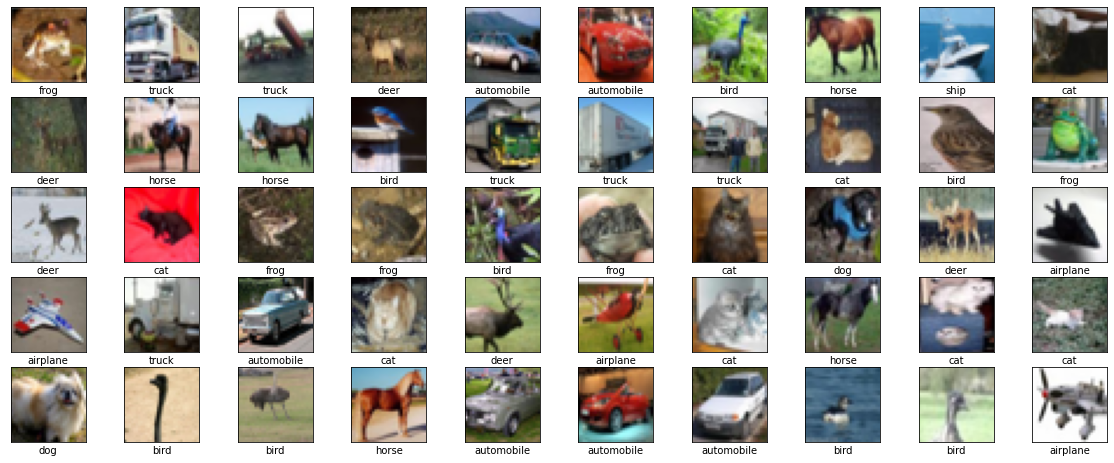

In [5]:
plt.figure(figsize = (20, 8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(x_train[i])
    plt.xticks([]) 
    plt.yticks([]) 
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# normalize pixel value between 1 and 0

In [6]:
x_train = x_train / 255
x_test = x_test / 255

# CNN model build

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (2, 2), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
Total params: 9,152
Trainable params: 9,152
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                802880    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:

h = model.fit(x=x_train, y=y_train, epochs=30, validation_data=(x_test, y_test),  batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 18s 8ms/step - loss: 1.3935 - accuracy: 0.5034 - val_loss: 1.2108 - val_accuracy: 0.5768
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0327 - accuracy: 0.6394 - val_loss: 0.9914 - val_accuracy: 0.6550
Epoch 3/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8856 - accuracy: 0.6912 - val_loss: 0.9393 - val_accuracy: 0.6739
Epoch 4/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7771 - accuracy: 0.7273 - val_loss: 0.9253 - val_accuracy: 0.6798
Epoch 5/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6863 - accuracy: 0.7615 - val_loss: 0.9056 - val_accuracy: 0.6898
Epoch 6/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5954 - accuracy: 0.7935 - val_loss: 0.9470 - val_accuracy: 0.6898
Epoch 7/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5151 - accuracy: 0.8207 - val_loss: 1.0014 - val_ac

# plotting train accuracy and validation accuracy

<function matplotlib.pyplot.show>

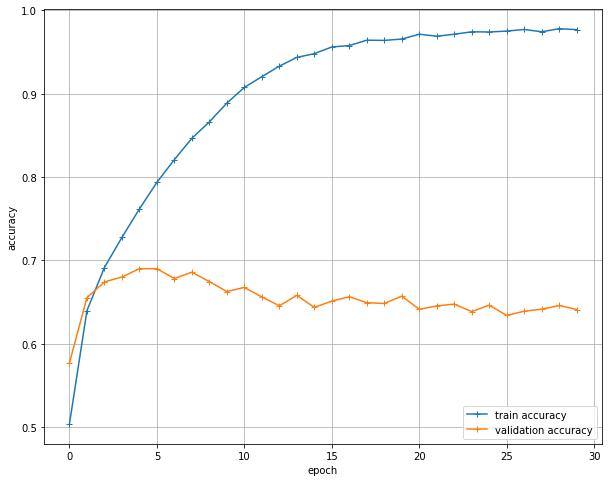

In [11]:
plt.figure(figsize = (10, 8))
plt.plot(h.history['accuracy'], '+-',label='train accuracy')
plt.plot(h.history['val_accuracy'], '+-', label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show


# plotting train loss and validation loss

<function matplotlib.pyplot.show>

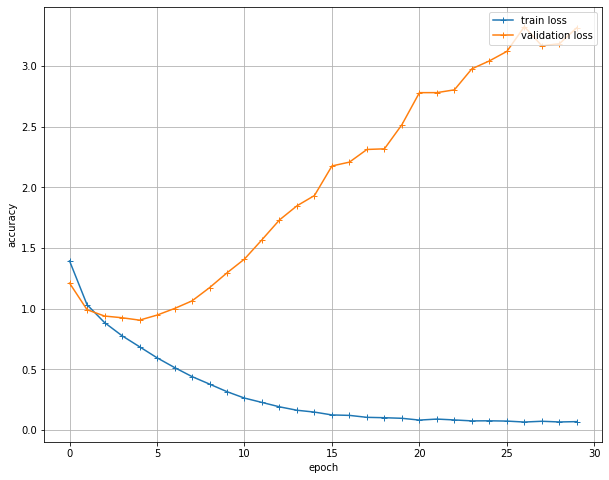

In [12]:
plt.figure(figsize = (10, 8))
plt.plot(h.history['loss'], '+-', label='train loss')
plt.plot(h.history['val_loss'], '+-', label='validation loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.grid(True)
plt.show

# model evaluation

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 3.3153 - accuracy: 0.6408

Test Accuracy: 0.6407999992370605

Test Loss: 3.315282106399536


# prediction from test set

In [14]:
predictions = model.predict(x_test)
predictions[0]
np.argmax(predictions[0])

3

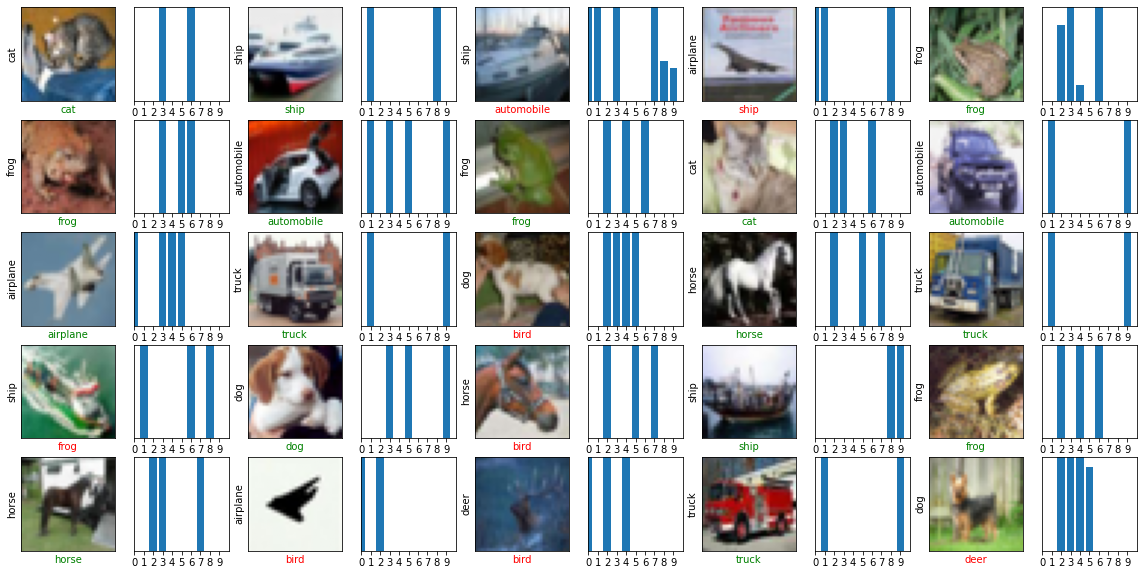

In [15]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[y_test[i][0]])
    if y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()

# Google drive mount

In [16]:
import scipy.io as sio
GOOGLE_COLAB = True
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive')
    path = "/content/drive/My Drive/Cifar-10 dataset/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# loading and reshaping a fully different image from outside the dataset

(32, 32, 3)
(1, 32, 32, 3)


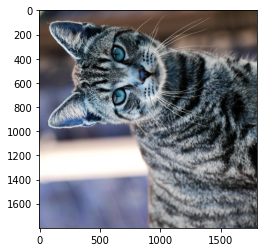

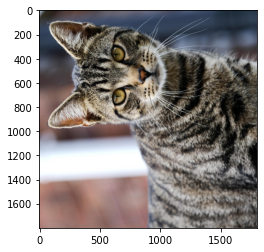

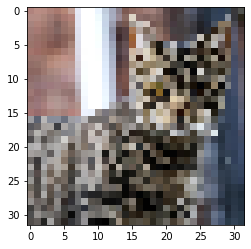

In [17]:
from scipy import misc
import cv2
from math import sqrt 
from numpy import ndarray

test_image = path + 'TestImage.jpg'

img0 = cv2.imread(test_image)
plt.figure()
plt.imshow(img0)

img1 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img1)

img2 = cv2.resize(img1, (32, 32))
img2 = cv2.rotate(img2, cv2.cv2.ROTATE_90_CLOCKWISE)
plt.figure()
plt.imshow(img2)
print(img2.shape)



img_test = np.reshape(img2, [-1,32,32,3], order = 'F')
print(img_test.shape)

# classifying the new image

In [18]:
predictions_new = model.predict(img_test)
predictions_new

np.argmax(predictions_new)
print(class_names[np.argmax(predictions_new)])

automobile
